### Урок 12. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [23]:
import numpy as np
import pandas as pd


data = pd.read_csv('non_linear.csv',sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


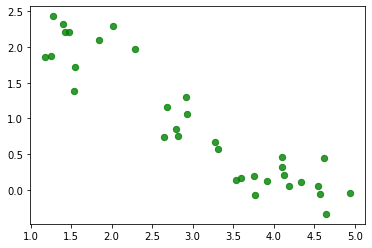

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data.x_train,data.y_train,40,'g','o',alpha=0.8,label='data')
plt.show()

In [25]:
from scipy.spatial import distance

def gradient(X, y, w, lam) -> np.array:
    n = X.shape[0]
    
    y_hat = X.dot(w.T)
    
    error = y-y_hat
    
    grad = np.multiply(X,error).sum(axis=0)*(-1.0)*2.0/n + 2 * lam * w
    return grad,error


In [26]:
def eval_w_next(X,y,eta,w_current,lam):
    grad,error = gradient(X,y,w_current,lam)
    # шаг
    w_next = w_current - eta *grad
    # условие сходимости
    weight_evolution = distance.euclidean(w_current,w_next)
    return (w_next,weight_evolution,grad)

In [36]:
def gradient_descent(X, y, eta=0.01, epsilon=0.001, lam=0.1):
    m = X.shape[1] # число фичей - это размерность градиента
    w = np.random.random(m).reshape(1,-1) 
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lam)
    step = 0
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w, lam)
        step += 1
        if step%100 == 0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w

In [37]:
X = data.x_train.values.reshape(-1,1)
n = X.shape[0]

X = np.hstack(
    [np.ones(n).reshape(-1,1), X]
)
X.shape

(34, 2)

In [38]:
w = gradient_descent(X, data.y_train.values.reshape(-1,1), eta=0.0085, epsilon=0.001)


step 100 |w-w_next|=0.00356, grad=[[-0.40210947  0.11616143]]
step 200 |w-w_next|=0.00244, grad=[[-0.27565339  0.07963078]]
step 300 |w-w_next|=0.00167, grad=[[-0.18896544  0.05458836]]
step 400 |w-w_next|=0.00115, grad=[[-0.12953927  0.03742132]]


В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.